## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [6]:
#可以嘗試用範例的程式

df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [7]:
#合併資料
df = pd.concat([df_train, df_test], axis = 0, ignore_index = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# 以 XXX 為例，先看 Cabin  出現值的特性
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

29.881137667304014
14.413493211271334
23.87751718869366
17.590844644704124


C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


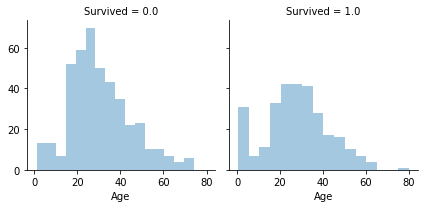

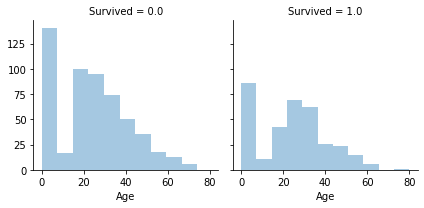

In [9]:
# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print(df['Age'].mean()) #age平均
print(df['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df['Age']=df['Age'].fillna(0)
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
df[df['Age'].isnull().values==True]
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


29.881137667304014
14.413493211271334
29.881137667303985
12.883193243702001


C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


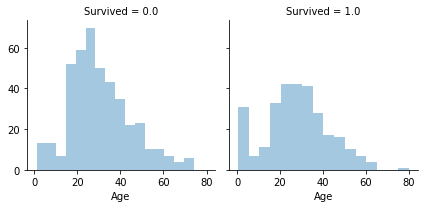

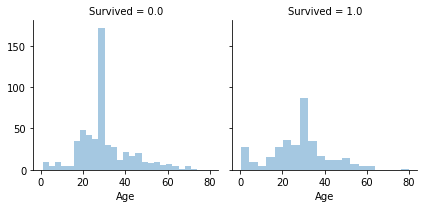

In [10]:
df = pd.concat([df_train, df_test], axis = 0, ignore_index = True)
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df['Age']=df['Age'].fillna(df['Age'].mean())
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
df[df['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

29.881137667304014
14.413493211271334
29.88771996939556
14.48476368019123


C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


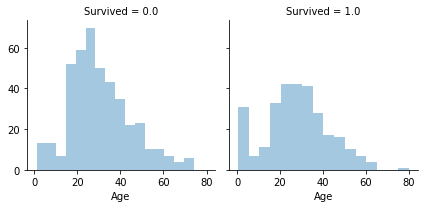

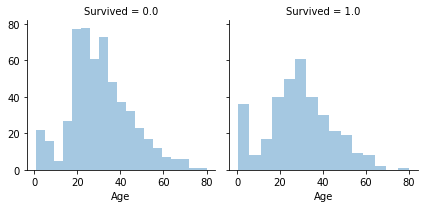

In [11]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
df = pd.concat([df_train, df_test], axis = 0, ignore_index = True)
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df['Age']=df['Age'].fillna(method='bfill')
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
df[df['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

29.881137667304014
14.413493211271334
29.75509549274255
14.347469886198386


C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


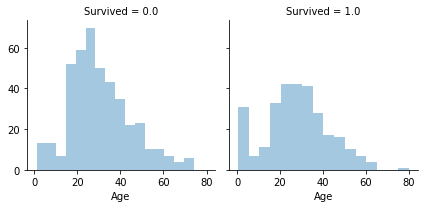

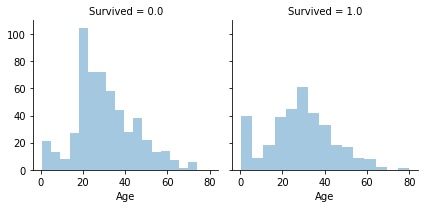

In [12]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
df = pd.concat([df_train, df_test], axis = 0, ignore_index = True)
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df['Age']=df['Age'].fillna(method='pad')
print(df['Age'].mean())
print(df['Age'].std()) #age標準差
df[df['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)